In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
df = pd.read_csv('data/bitcoin/bitcoin_preprocessed.csv', parse_dates=["Date"])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5282 non-null   datetime64[ns]
 1   Close     5282 non-null   float64       
 2   Open      5282 non-null   float64       
 3   High      5282 non-null   float64       
 4   Low       5282 non-null   float64       
 5   Volume    5282 non-null   float64       
 6   Change %  5282 non-null   object        
 7   Average   5282 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 330.2+ KB


In [50]:
def exponential_moving_average(data, alpha=None, window=None):
    if window and alpha is None:
        alpha = 2 / (window + 1)

    ema = [data[0]]  # Initialize with first data point
    
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])

    return ema

In [51]:
def plot_ema(years, data, ema_values, title="Exponential Moving Average (EMA) Visualization"):
    plt.figure(figsize=(16, 9))
    plt.plot(years, data, linestyle='-', color='blue', label="Original Data")
    plt.plot(years, ema_values, linestyle='--', color='red', label="EMA")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [52]:
def calculate_mae(data, ema_values):
    mae = np.mean(np.abs(np.array(data) - np.array(ema_values)))
    return mae

The Mean Absolute Error (MAE) is 66.8141


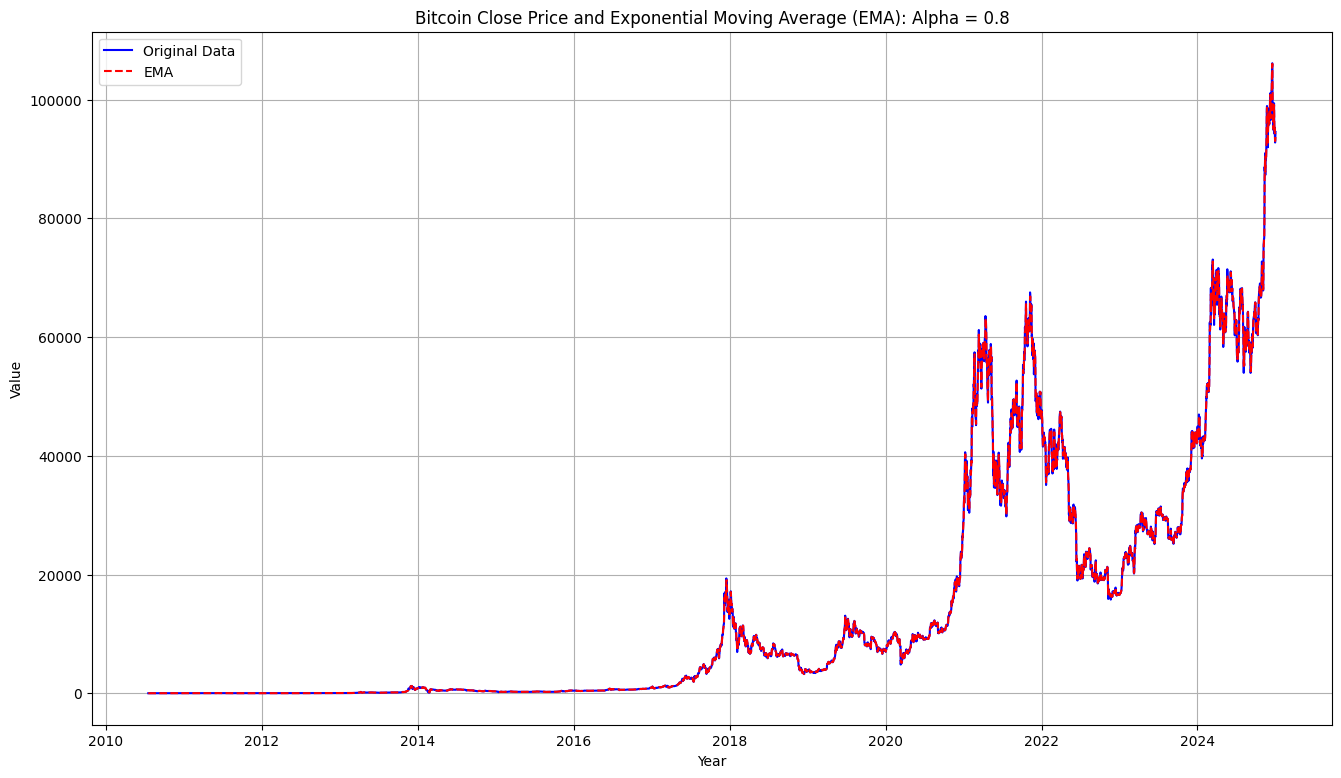

In [61]:
data_series = df["Close"].values
alpha = 0.8
ema_values = exponential_moving_average(data_series, alpha=alpha)
mae = calculate_mae(data_series, ema_values)
print(f"The Mean Absolute Error (MAE) is {mae:.4f}")
plot_ema(df["Date"], data_series, ema_values, title=f"Bitcoin Close Price and Exponential Moving Average (EMA): Alpha = {alpha}")